<h1 style="text-align: center; color: #d62828;">🫀 Capstone Practical Project  2 🫀</h1>
<h2 style="text-align: center; color: #1d3557;">💻 Introduction to Artificial Intelligence - CQ2022/3 💻</h2>

<h3 style="text-align: center; color: #457b9d;"> Team Members</h3>
<table style="margin-left: auto; margin-right: auto; border-collapse: collapse; width: 40%; font-size: 16px; border: 1px solid #333;">
    <tr style="background-color: #a8dadc; color: #1d3557;">
        <th style="padding: 8px; border: 1px solid #333; text-align: left; width: 45%;">Name</th>
        <th style="padding: 8px; border: 1px solid #333; text-align: center; width: 55%;">MSSV</th>
    </tr>
    <tr style="background-color: #f1faee;">
        <td style="padding: 8px; border: 1px solid #333; text-align: left;">Nguyễn Nhật Long</td>
        <td style="padding: 8px; border: 1px solid #333; text-align: center;">22120194</td>
    </tr>
    <tr style="background-color: #f1faee;">
        <td style="padding: 8px; border: 1px solid #333; text-align: left;">Nguyễn Vĩnh Lương</td>
        <td style="padding: 8px; border: 1px solid #333; text-align: center;">22120197</td>
    </tr>
    <tr style="background-color: #f1faee;">
        <td style="padding: 8px; border: 1px solid #333; text-align: left;">Nguyễn Minh Nguyên</td>
        <td style="padding: 8px; border: 1px solid #333; text-align: center;">22120238</td>
    </tr>
    <tr style="background-color: #f1faee;">
        <td style="padding: 8px; border: 1px solid #333; text-align: left;">Giang Đức Nhật</td>
        <td style="padding: 8px; border: 1px solid #333; text-align: center;">22120252</td>
    </tr>
</table>

<p style="text-align: center; font-size: 18px; color: #000000;"><strong>GVHD:</strong> Phd. Bùi Duy Đăng</p>
<p style="text-align: center; font-size: 18px; color: #000000;"><strong>GVTH:</strong> M.Sc. Nguyễn Thanh Tình</p>

<!-- Dòng nổi bật về Dataset 3 với hình minh họa mới -->
<div style="text-align: center; margin-top: 30px; margin-bottom: 20px;">
    <img src="https://cdn-icons-png.flaticon.com/512/4149/4149683.png" alt="Brain Icon" width="90" style="margin-bottom: 15px;">
    <h2 style="color: #e63946; font-size: 26px; background-color: #f1faee; display: inline-block; padding: 12px 20px; border: 2px solid #e63946; border-radius: 12px; box-shadow: 0 0 10px #e63946;">
        <strong>🩺 Dataset 3: <span style="color: #1d3557;">Stroke Prediction</span> – Dự đoán đột quỵ cứu người! 🏥</strong>
    </h2>
</div>

<hr style="border: 1px solid #d62828;">


## **<font color = red>✨ I. Prepare libraries:** </font>

### **<font color = red>🛠️ 1. Install packages:** </font>

In [1]:
%pip install -q numpy pandas matplotlib seaborn scipy statsmodels scikit-learn ipython

Note: you may need to restart the kernel to use updated packages.


### **<font color = red>📊 2. Import libraries** </font>

In [2]:
# ==============================
# 1. Thư viện xử lý dữ liệu
# ==============================
import numpy as np
import pandas as pd
import os

# ==============================
# 2. Thư viện trực quan hóa
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# ==============================
# 3. Thư viện thống kê
# ==============================
import scipy.stats as stats
import statsmodels.api as sm

# ==============================
# 4. Thư viện Jupyter hỗ trợ hiển thị
# ==============================
from IPython.display import display

# ==============================
# 5. Thư viện xử lý pipeline & tiền xử lý
# ==============================
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ==============================
# 6. Thư viện mô hình và trực quan cây quyết định
# ==============================
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# ==============================
# 7. Thư viện đánh giá và chia tập dữ liệu
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# ==============================
# 8. Thư viện vẽ biểu đồ
# ==============================
import matplotlib.pyplot as plt

## **<font color = red>🔍 II> Prepare Dataset:** </font>

Dữ liệu mà em sử dụng được lấy từ [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ luôn nằm trong top các nguyên nhân gây tử vong nhiều nhất trên toàn thế giới ([nguồn](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)). Dataset này được tác giả sử dụng để dự đoán xem một bệnh nhân liệu có bị đột quỵ hay không dựa trên các thông tin như tuổi, giới tính, các loại bệnh, tình trạng hút thuốc,...

Đối với dataset này, tác giả đã không cung cấp nguồn của dữ liệu cũng như cách mà tác giả thu thập các dữ liệu này.

Ngoài ra, tác giả cũng đã cấp phép cho phép sử dụng dataset này vào mục đích giáo dục.

<center>
<image src=img/src.png>
</center>

### **<font color = red>🔥 1. Data Exploration:** </font>

#### **<font color = red>📏 1.1  Load Dataset and Display First Rows:** </font>

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

<a id="kich-thuoc-cua-tap-du-lieu"></a>
#### **<font color = red>🗃️ 1.2 Dataset size:** </font>

In [4]:
shape = df.shape
print(f'Số cột {shape[1]}')
print(f'Số dòng {shape[0]}')

Số cột 12
Số dòng 5110


#### **<font color = red>🕵️‍♂️ 1.3 Checking for Null or Missing Data:** </font>

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<a id="du-lieu-co-bi-trung-lap-khong"></a>
#### **<font color = red>⚠️ 1.4 Detecting for Duplicate Records** </font>

In [6]:
count_duplicate = df.duplicated().sum()
print(f'Có {count_duplicate} dòng bị trùng lắp.' if count_duplicate > 0 else 'Không có dòng bị trùng lắp.')

Không có dòng bị trùng lắp.


#### **<font color = red>🔢 1.5 Inspecting Column Data Types and Validity** </font>

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Có vẻ như kiểu dữ liệu của các cột đã khá hợp lý, tuy nhiên có cột `id` tuy là giá trị số nguyên nhưng giá trị của nó không có ý nghĩa về độ lớn, do đó em sẽ chuyển sang kiểu category.

In [8]:
df['id'] = df['id'].astype('category')
df.dtypes

id                   category
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
dtype: object

<a id="cac-cot-co-y-nghia-gi"></a>
#### <font color = red> **🔑1.6 Understanding the Meaning of Each Column** </font>

Mỗi cột là một đặc trưng tượng trưng cho chỉ số của 1 bệnh nhân, cụ thể như sau:

1) `id`: số định danh, mỗi người có một số khác nhau.

2) `gender`: giới tính, thuộc 1 trong 3 giá trị: "Male", "Female" hoặc "Other".

3) `age`: tuổi của bệnh nhân.

4) `hypertension`: tình trạng cao huyết áp của bệnh nhân, 1 nếu bệnh nhân bị cao huyết áp, 0 nếu ngược lại.

5) `heart_disease`: tình trạng bệnh tim của bệnh nhân, 1 nếu bệnh nhân bị bệnh tim, 0 nếu ngược lại.

6) `ever_married`: liệu bệnh nhân đã từng kết hôn hay chưa, "Yes" nếu đã từng kết hôn, "No" nếu ngược lại.

7) `work_type`: tình trạng công việc, cụ thể

    - "Children": trẻ em, chưa tham gia vào lao động.
    
    - "Govt_job": công việc trong các cơ quan chính phủ.
    
    - "Never_worked": chưa từng làm việc.

    - "Private": công việc trong các công ty, doanh nghiệp tư nhân hoặc các tổ chức phi chính phủ.

    - "Self-employed": lao động tự do.

8) `Residence_type`: nơi cư trú, "Rural" nếu ở nông thôn, "Urban" nếu ở thành thị.

9) `avg_glucose_level`: mức đường huyết trung bình.

10) `bmi`: chỉ số BMI.

11) `smoking_status`: tình trạng hút thuốc của bệnh nhân, cụ thể:

    - "formerly smoked": đã từng hút thuốc, đã bỏ. 

    - "never smoked": chưa bao giờ hút thuốc.

    - "smokes": hiện tại vẫn hút thuốc.  
    
    - "Unknown": không có thông tin.

12) `stroke`: liệu bệnh nhân có bị đột quỵ không, 1 là có, ngược lại là 0.

### **<font color = red>🧼 2. Data Preprocessing** </font>

#### **<font color = red>✂️ 2.1 Splitting Features and Labels:** </font>

In [9]:
# Tách features và label
X = df.drop(columns=["id", "stroke"])
y = df["stroke"].values

#### **<font color = red>⚡ 2.2 One-Hot Encoding for Categorical Variables:** </font>

In [10]:
X_encoded = pd.get_dummies(X, drop_first=True)
feature_names = X_encoded.columns.tolist()
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

### **<font color = red>🔮 3. Visualization:** </font>

#### **<font color = red>🖼️ 3.1 Distribution of the Original Dataset:** </font>

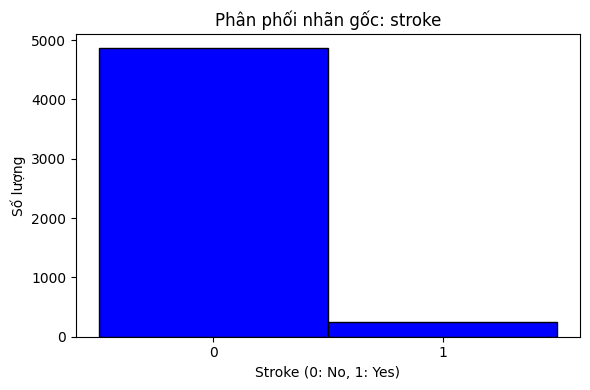

In [20]:
os.makedirs("Dataset 03/Distribution", exist_ok=True)

plt.figure(figsize=(6, 4))
plt.hist(df["stroke"], bins=np.arange(3) - 0.5, color="blue", edgecolor="black")
plt.xticks([0, 1])
plt.title("Phân phối nhãn gốc: stroke")
plt.xlabel("Stroke (0: No, 1: Yes)")
plt.ylabel("Số lượng")
plt.tight_layout()

# Lưu hình vào thư mục Distribution
plt.savefig("Dataset 03/Distribution/distribution_origin.png")
plt.show()

#### **<font color = red>➗ 3.2  Train/Test Distribution by Split Ratio:** </font>

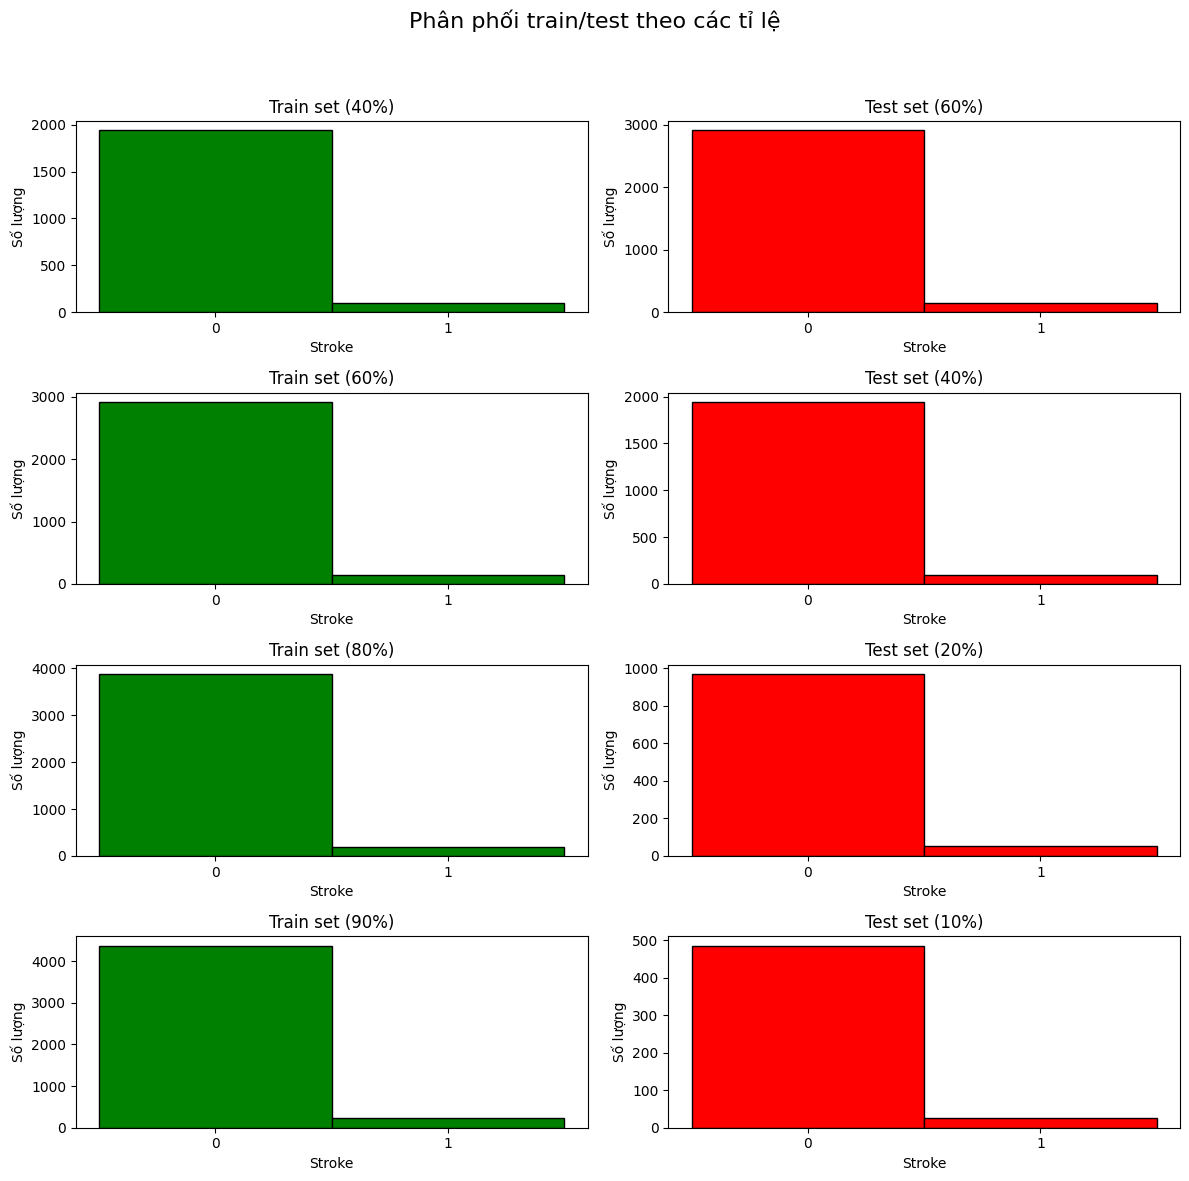

In [12]:
os.makedirs("Dataset 03/Distribution", exist_ok=True)

split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
fig.suptitle("Phân phối train/test theo các tỉ lệ", fontsize=16)

for row, (train_ratio, test_ratio) in enumerate(split_ratios):
    X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(
        df.drop(columns=["id", "stroke"]),
        df["stroke"],
        test_size=test_ratio,
        stratify=df["stroke"],
        random_state=42
    )

    # Train set
    axes[row, 0].hist(y_train_tmp, bins=np.arange(3) - 0.5, color='green', edgecolor='black')
    axes[row, 0].set_title(f"Train set ({int(train_ratio*100)}%)")
    axes[row, 0].set_xticks([0, 1])
    axes[row, 0].set_xlabel("Stroke")
    axes[row, 0].set_ylabel("Số lượng")

    # Test set
    axes[row, 1].hist(y_test_tmp, bins=np.arange(3) - 0.5, color='red', edgecolor='black')
    axes[row, 1].set_title(f"Test set ({int(test_ratio*100)}%)")
    axes[row, 1].set_xticks([0, 1])
    axes[row, 1].set_xlabel("Stroke")
    axes[row, 1].set_ylabel("Số lượng")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # chừa chỗ cho tiêu đề lớn
plt.savefig("Dataset 03/Distribution/distribution_split_all.png", dpi=300)
plt.show()

## **<font color = red>🌳 III> Building Decision tree:** </font>

#### **<font color = red>🤖 1. Train model:** </font>

In [13]:
trained_models = {}

for i, (train_ratio, test_ratio) in enumerate(split_ratios):
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded.values, y,
        test_size=test_ratio,
        stratify=y,
        random_state=42
    )

    clf = DecisionTreeClassifier(random_state=42)  
    clf.fit(X_train, y_train)

    # Lưu mô hình và dữ liệu
    trained_models[f"split_{int(train_ratio*100)}"] = {
        "model": clf,
        "X_test": X_test,
        "y_test": y_test
    }


#### **<font color = red>📊 2. Visualization with graphiz:** </font>


🧠 Decision tree (40/60 split)


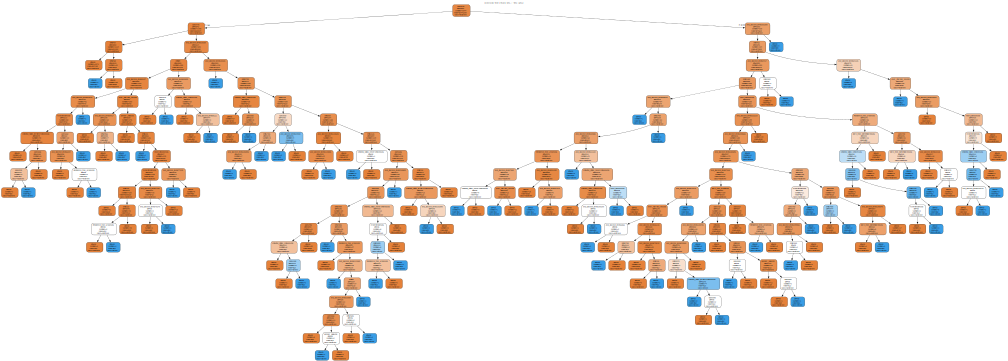


🧠 Decision tree (60/40 split)


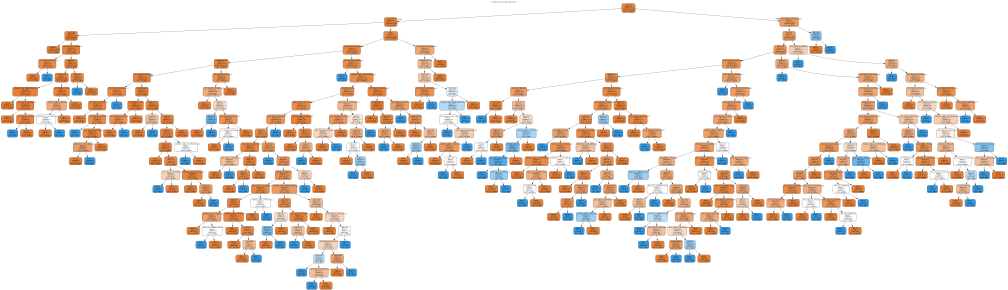


🧠 Decision tree (80/20 split)


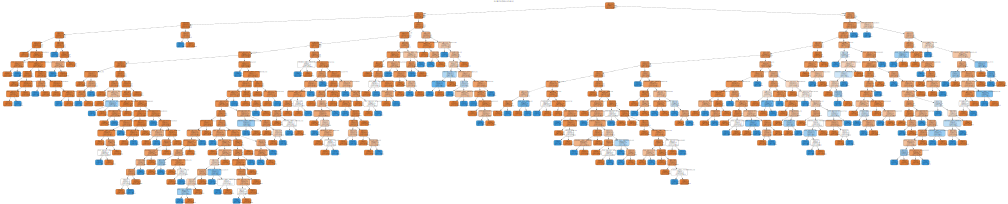


🧠 Decision tree (90/10 split)


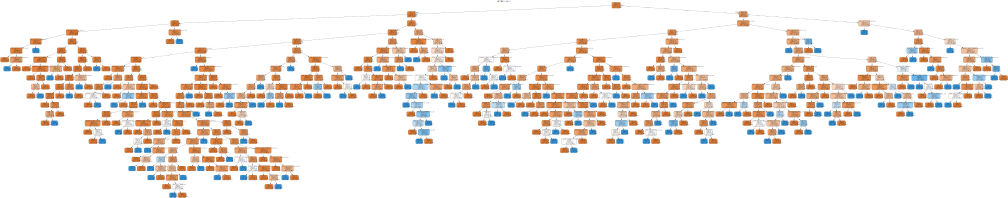

In [21]:
os.makedirs("Dataset 03/Decision Tree", exist_ok=True)

for label, content in trained_models.items():
    clf = content["model"]
    train_ratio = label.split("_")[1]
    test_ratio = 100 - int(train_ratio)

    print(f"\n🧠 Decision tree ({train_ratio}/{test_ratio} split)")

    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=X_encoded.columns,
        class_names=["No Stroke", "Stroke"],
        filled=True,
        rounded=True,
        special_characters=True
    )

    title = f"Decision Tree (Train {train_ratio}% / Test {test_ratio}%)"
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\n'
        f'label="{title}";\n'
        f'labelloc=top;\n'
        f'fontsize=20;\n'
        f'size="14,12";\n'
        f'node [fontsize=10];\n'
        f'graph [fontsize=12];'
    )

    graph = graphviz.Source(dot_data)
    display(graph)  # Hiển thị trong Jupyter Notebook

    # Đặt tên file trong thư mục Evaluation
    filename = os.path.join("Dataset 03/Decision Tree", f"{label}_tree")
    graph.render(filename=filename, format='pdf', cleanup=True)

## **<font color = red>📑 IV> Decision tree evaluation:** </font>

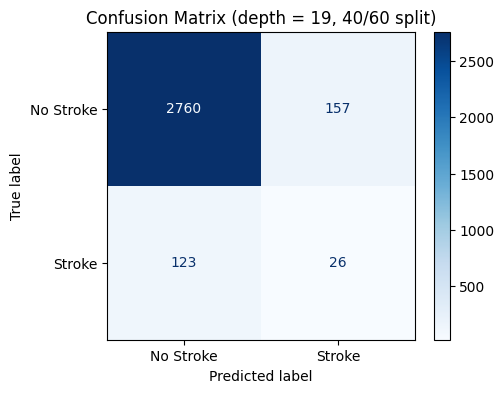

Classification Report (depth = 19, 40/60 split):
              precision    recall  f1-score   support

   No Stroke       0.96      0.95      0.95      2917
      Stroke       0.14      0.17      0.16       149

    accuracy                           0.91      3066
   macro avg       0.55      0.56      0.55      3066
weighted avg       0.92      0.91      0.91      3066

------------------------------------------------------------


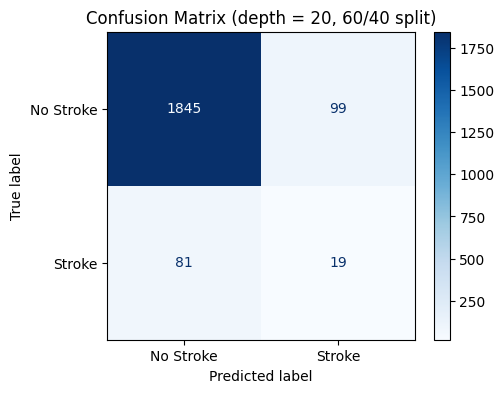

Classification Report (depth = 20, 60/40 split):
              precision    recall  f1-score   support

   No Stroke       0.96      0.95      0.95      1944
      Stroke       0.16      0.19      0.17       100

    accuracy                           0.91      2044
   macro avg       0.56      0.57      0.56      2044
weighted avg       0.92      0.91      0.92      2044

------------------------------------------------------------


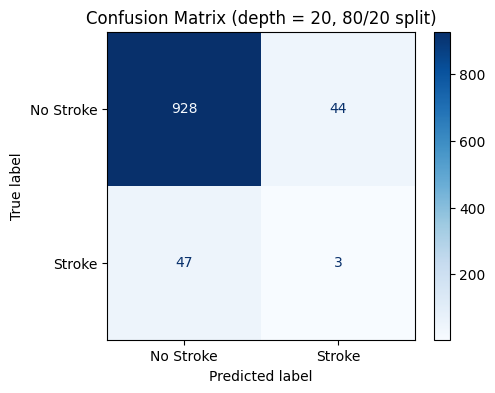

Classification Report (depth = 20, 80/20 split):
              precision    recall  f1-score   support

   No Stroke       0.95      0.95      0.95       972
      Stroke       0.06      0.06      0.06        50

    accuracy                           0.91      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.91      0.91      0.91      1022

------------------------------------------------------------


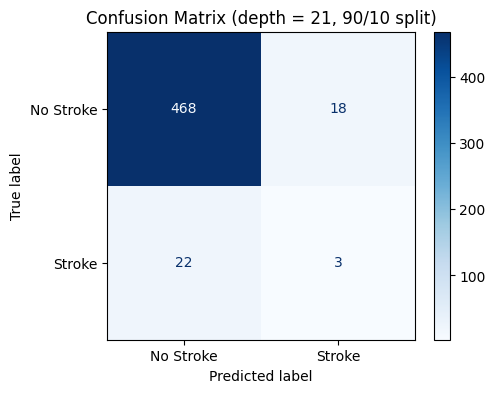

Classification Report (depth = 21, 90/10 split):
              precision    recall  f1-score   support

   No Stroke       0.96      0.96      0.96       486
      Stroke       0.14      0.12      0.13        25

    accuracy                           0.92       511
   macro avg       0.55      0.54      0.54       511
weighted avg       0.92      0.92      0.92       511

------------------------------------------------------------


In [15]:
os.makedirs("Dataset 03/Evaluation", exist_ok=True)

for label, content in trained_models.items():
    model = content["model"]
    X_test = content["X_test"]
    y_test = content["y_test"]

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

    train_ratio = int(label.split("_")[1])
    test_ratio = 100 - train_ratio
    depth = model.get_depth()

    # Vẽ ma trận nhầm lẫn và lưu
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d', ax=ax)
    plt.title(f"Confusion Matrix (depth = {depth}, {train_ratio}/{test_ratio} split)")
    plt.grid(False)

    cm_filename = os.path.join("Dataset 03/Evaluation", f"{label}_confusion_matrix.png")
    plt.savefig(cm_filename, dpi=300, bbox_inches='tight')
    plt.show()  # Hiển thị hình trên output

    # Classification report
    report = classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"])
    print(f"Classification Report (depth = {depth}, {train_ratio}/{test_ratio} split):")
    print(report)
    print("-" * 60)

    report_filename = os.path.join("Dataset 03/Evaluation", f"{label}_classification_report.txt")
    with open(report_filename, "w") as f:
        f.write(f"Classification Report (depth = {depth}, {train_ratio}/{test_ratio} split):\n\n")
        f.write(report)

## **<font color = red>🎯 V> Depth and Accuracy of Decision tree:** </font>

### **<font color = red>🚀 1. Model Training** </font>

--------------------------- Decision Tree (max = None) ---------------------------
Accuracy: 0.9110


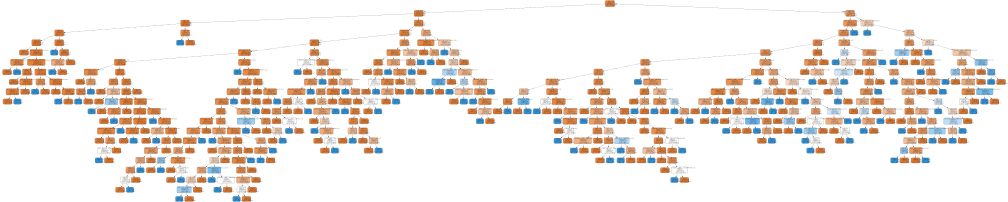

--------------------------- Decision Tree (max = 2) ---------------------------
Accuracy: 0.9511


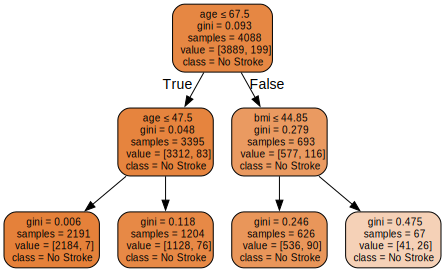

--------------------------- Decision Tree (max = 3) ---------------------------
Accuracy: 0.9491


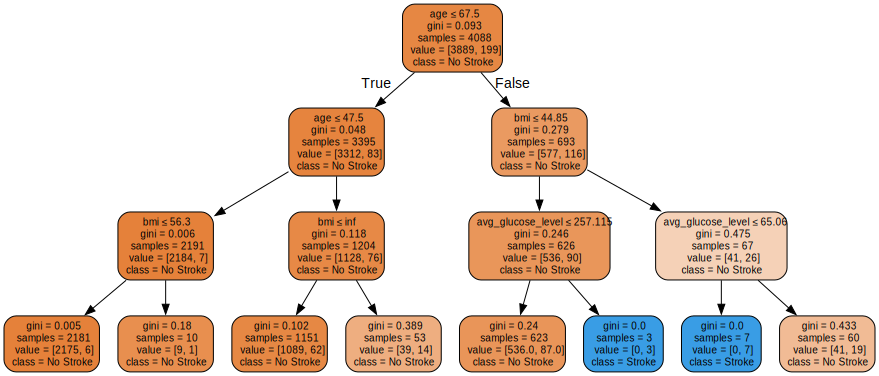

--------------------------- Decision Tree (max = 4) ---------------------------
Accuracy: 0.9491


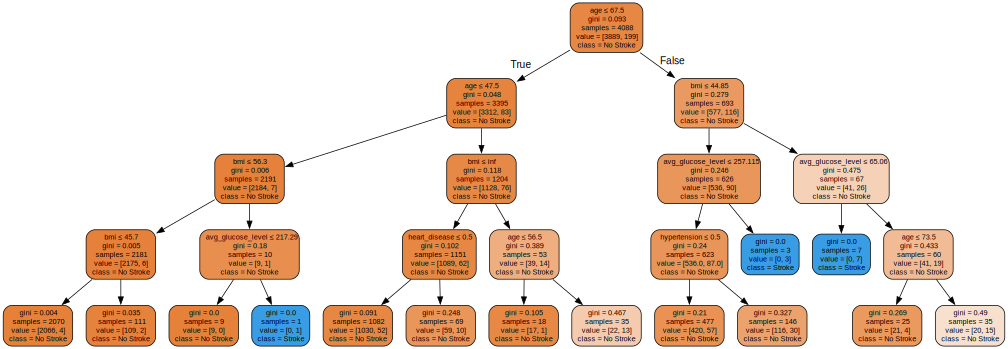

--------------------------- Decision Tree (max = 5) ---------------------------
Accuracy: 0.9442


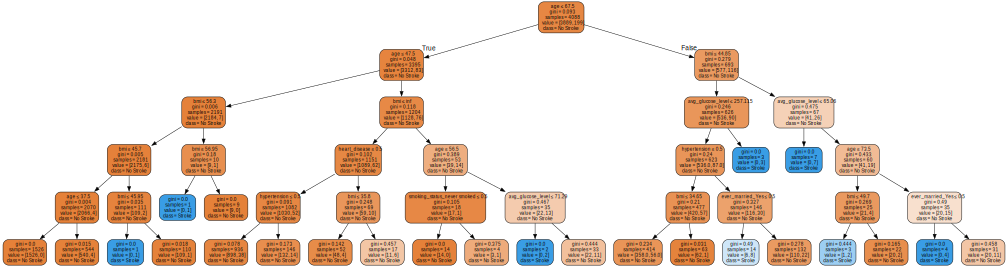

--------------------------- Decision Tree (max = 6) ---------------------------
Accuracy: 0.9442


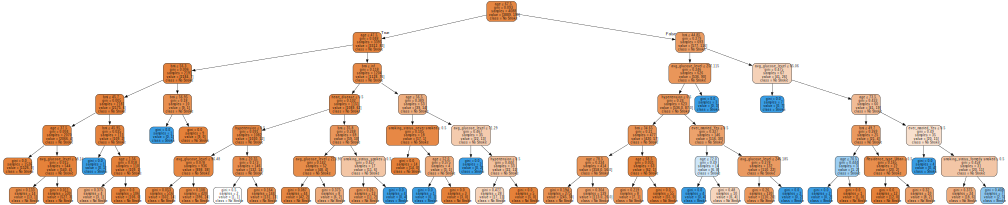

--------------------------- Decision Tree (max = 7) ---------------------------
Accuracy: 0.9432


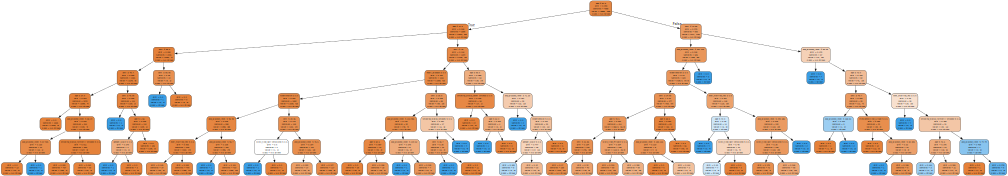

In [ ]:
os.makedirs("Dataset 03/Depth and Accuracy", exist_ok=True)

# Tách dữ liệu
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X_encoded.values, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

depth_values = [None, 2, 3, 4, 5, 6, 7]

for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_80, y_train_80)
    y_pred = clf.predict(X_test_20)
    acc = accuracy_score(y_test_20, y_pred)

    # In thông tin đánh giá
    title = f"--------------------------- Decision Tree (max = {depth if depth is not None else 'None'}) ---------------------------"
    print(title)
    print(f"Accuracy: {acc:.4f}")

    # Tạo biểu đồ cây
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        class_names=["No Stroke", "Stroke"],
        filled=True,
        rounded=True,
        special_characters=True
    )

    # Thêm style
    dot_data = dot_data.replace(
        'digraph Tree {',
        'digraph Tree {\nsize="14,12";\nnode [fontsize=10];\ngraph [fontsize=12];'
    )

    # Hiển thị
    graph = graphviz.Source(dot_data)
    display(graph)

    # Lưu file PDF
    depth_label = 'None' if depth is None else str(depth)
    filename = os.path.join("Dataset 03/Depth and Accuracy", f"decision_tree_depth_{depth_label}")
    graph.render(filename=filename, format='pdf', cleanup=True)

### **<font color = red>💡 2. Summary Statistics Table:** </font>

In [17]:
# Huấn luyện với từng độ sâu
depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = {}

for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_80, y_train_80)
    y_pred = clf.predict(X_test_20)
    acc = accuracy_score(y_test_20, y_pred)
    accuracy_results[depth] = acc

# ---------------------------
# In bảng theo định dạng
# ---------------------------
col_width = 10

header = "max_depth".ljust(col_width) + "|"
for d in depth_values:
    header += f" {('None' if d is None else str(d)).center(col_width)} |"

acc_line = "Accuracy".ljust(col_width) + "|"
for d in depth_values:
    acc_line += f" {accuracy_results[d]:>{col_width}.4f} |"

print("\n📋 Bảng Accuracy:")
print(header)
print(acc_line)


📋 Bảng Accuracy:
max_depth |    None    |     2      |     3      |     4      |     5      |     6      |     7      |
Accuracy  |     0.9110 |     0.9511 |     0.9491 |     0.9491 |     0.9442 |     0.9442 |     0.9432 |


### **<font color = red>📉 3. Plotting Charts** </font>

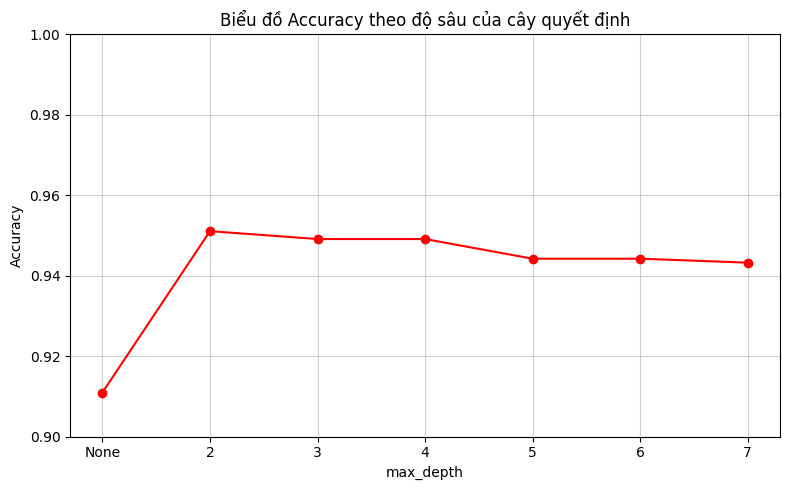

In [18]:
depth_labels = ['None' if d is None else str(d) for d in depth_values]
accuracy_vals = [accuracy_results[d] for d in depth_values]

plt.figure(figsize=(8, 5))
plt.plot(depth_labels, accuracy_vals, marker='o', linestyle='-', color='red')
plt.title("Biểu đồ Accuracy theo độ sâu của cây quyết định")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()